In [1]:
## Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
## Performing some exploratory analysis of the dataset
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


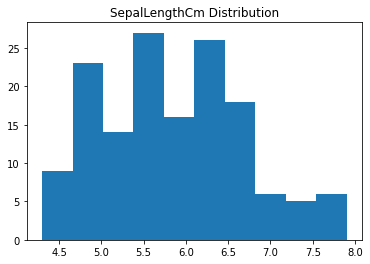

In [31]:
## Distribution of SepalLengthCm Feature
plt.hist(data['SepalLengthCm'])
plt.title('SepalLengthCm Distribution')
plt.show()
## Right Skewed Distribution

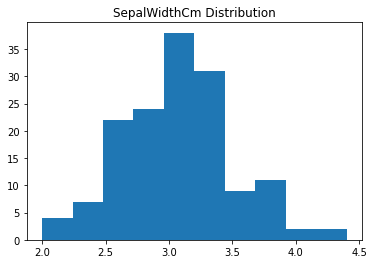

In [32]:
## Distribution of SepalWidthCm Feature
plt.hist(data['SepalWidthCm'])
plt.title('SepalWidthCm Distribution')
plt.show()
## Observed to be sort of a normal distribution

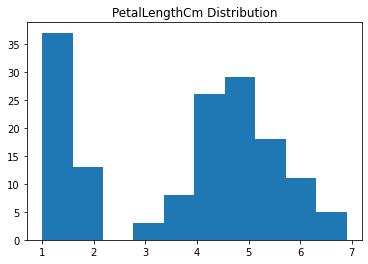

In [33]:
## Distribution of PetalLengthCm Feature
plt.hist(data['PetalLengthCm'])
plt.title('PetalLengthCm Distribution')
plt.show()
## Distribution is partially normal and right skewed

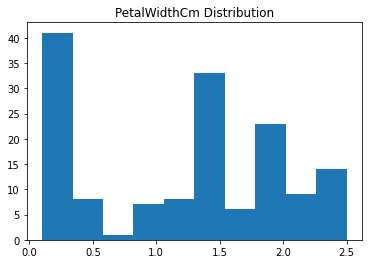

In [34]:
## Distribution of PetalWidthCm Feature
plt.hist(data['PetalWidthCm'])
plt.title('PetalWidthCm Distribution')
plt.show()
## Distribution is similar to that of SepalLengthCm

In [8]:
features = list(data.columns[1:5])
features ## names of features 

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

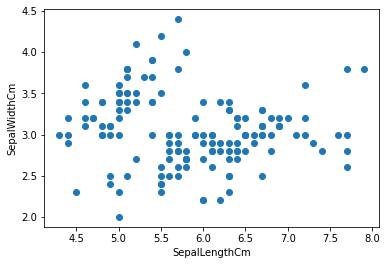

In [9]:
## Scatter Plots between features
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'])
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

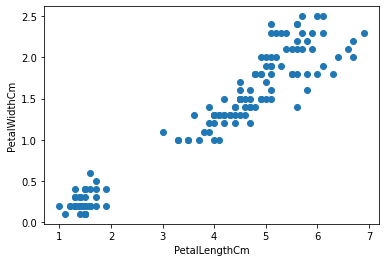

In [10]:
plt.scatter(data['PetalLengthCm'], data['PetalWidthCm'])
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.show()

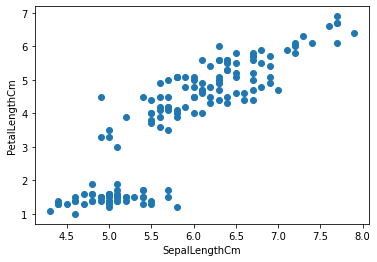

In [11]:
plt.scatter(data['SepalLengthCm'], data['PetalLengthCm'])
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.show()

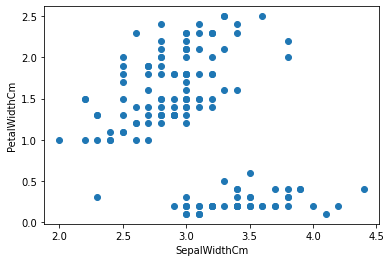

In [12]:
plt.scatter(data['SepalWidthCm'], data['PetalWidthCm'])
plt.xlabel('SepalWidthCm')
plt.ylabel('PetalWidthCm')
plt.show()

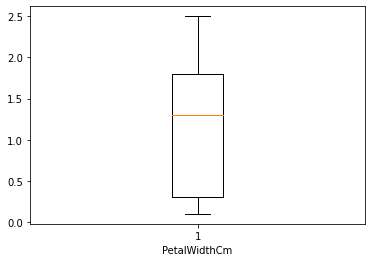

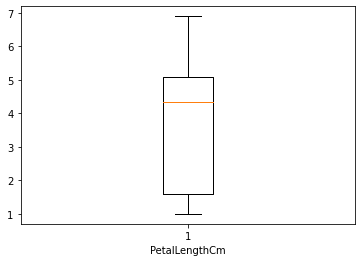

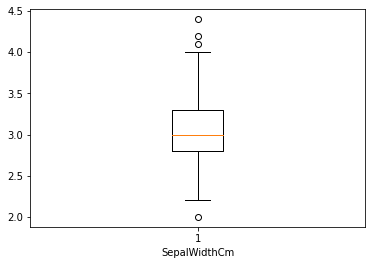

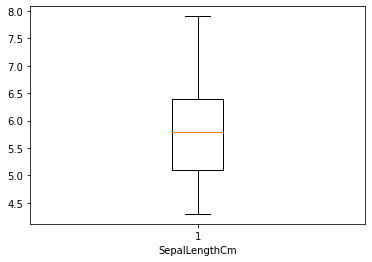

In [35]:
## Box plots of features
plt.boxplot(data['PetalWidthCm'])
plt.xlabel('PetalWidthCm')
plt.show()
plt.boxplot(data['PetalLengthCm'])
plt.xlabel('PetalLengthCm')
plt.show()
plt.boxplot(data['SepalWidthCm'])
plt.xlabel('SepalWidthCm')
plt.show()
plt.boxplot(data['SepalLengthCm'])
plt.xlabel('SepalLengthCm')
plt.show()

In [14]:
## Feature Engineering
X = data[features]
y = data['Species']

<Axes: >

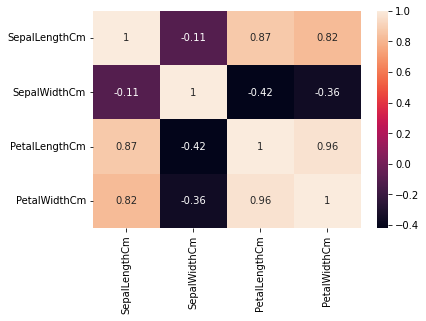

In [29]:
## Heatmap of correlation between features
import seaborn as sns
sns.heatmap(X.corr(), annot = True)

In [15]:
## Label Encoding
y = y.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0, 1, 2])
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [16]:
## Checking NaN values
X.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [17]:
# ## Label Encoding the labels
# from sklearn.preprocessing import LabelEncoder
# l = LabelEncoder()
# y = l.fit_transform(y)

In [18]:
## Count of each class in y
np.unique(y, return_counts=True) 

(array([0, 1, 2], dtype=int64), array([50, 50, 50], dtype=int64))

In [43]:
## Splitting data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=42)

In [44]:
X_train.shape, X_test.shape

((135, 4), (15, 4))

In [45]:
## Models
## Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model1 = LogisticRegression()
model1.fit(X_train, y_train) ## fitting the model on training data
print("Model Score is", model1.score(X_train, y_train))

y_pred = model1.predict(X_test) ## predicting on test data
## printing classification report
print(classification_report(y_test, y_pred))

Model Score is 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [46]:
## Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
print("Model Score is", model2.score(X_train, y_train))

y_pred = model2.predict(X_test)
print(classification_report(y_test, y_pred))

Model Score is 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [47]:
## Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(n_estimators=100)
model3.fit(X_train, y_train)
print("Model Score is", model3.score(X_train, y_train))

y_pred = model3.predict(X_test)
print(classification_report(y_test, y_pred))

Model Score is 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [51]:
## saving the random forest model to disk
import pickle
filename = 'RF_Iris.sav'
pickle.dump(model3, open(filename, 'wb'))

In [48]:
## SVC Classifier
from sklearn.svm import SVC

model4 = SVC()
model4.fit(X_train, y_train)
print("Model Score is", model4.score(X_train, y_train))

y_pred = model4.predict(X_test)
print(classification_report(y_test, y_pred))

Model Score is 0.9703703703703703
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [49]:
## Use of LazyPredict library to make a summary report of performance of all the known models
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:00<00:00, 55.24it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,None,1.00,0.06
LabelSpreading,1.00,1.00,None,1.00,0.01
XGBClassifier,1.00,1.00,None,1.00,0.07
SVC,1.00,1.00,None,1.00,0.00
RandomForestClassifier,1.00,1.00,None,1.00,0.08
PassiveAggressiveClassifier,1.00,1.00,None,1.00,0.01
NuSVC,1.00,1.00,None,1.00,0.01
LogisticRegression,1.00,1.00,None,1.00,0.01
BaggingClassifier,1.00,1.00,None,1.00,0.02


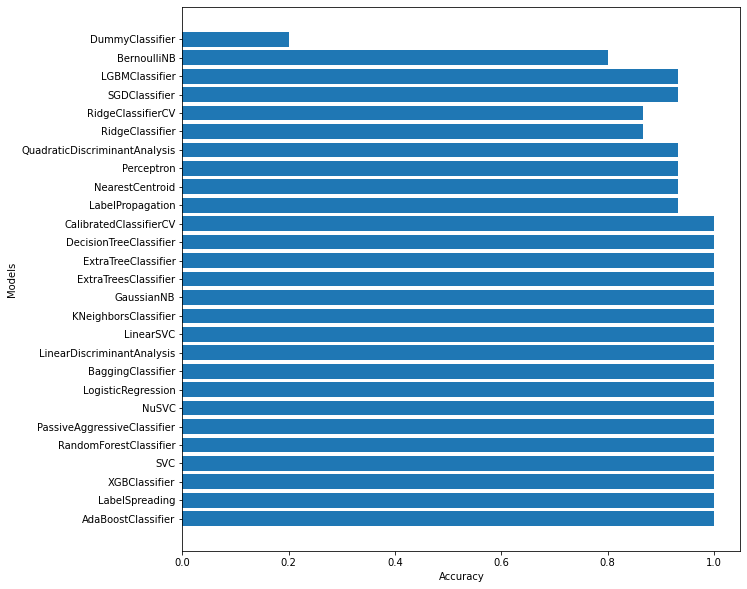

In [50]:
## Plot the scores of various models

plt.figure(figsize=(10, 10))
plt.barh(models.index, models['Accuracy'])
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.show()